<div style="font-family:Bradley Hand ITC; font-size: 25px; border-radius: 5px; padding: 2px; line-height: 2.0; color: #ff0000ff; text-align: center;">NIM: 240907501033</div>
<div style="font-family: Algerian; font-size:20px; border-radius: 5px;padding: 2px; line-height: 2.0; color: #956666ff; text-align: center;">Nama: Kania Salsabila Haflin</div>

<div style="font-family: Forte; font-size: 20px; border-radius: 5px;padding: 2px; line-height: 2.0; color: #ee51a7ff; text-align: center;">~~REGRESI DENGAN DATA RANDOM~~</div>

In [36]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as pyplot

np.random.seed(0)
X = 58.2 * np.random.randn(100) + 1.5
Y = 10.5 - np.random.randn(100)
Z = 7 + 0.3 * X + Y

df = pd.DataFrame(
    {'Saya': X,
     'Cinta': Y,
    'Indonesia': Z}
)

df.head()

,Saya,Cinta,Indonesia
0,104.167847,8.616849,46.867203
1,24.789150,11.847759,26.284504
2,58.462551,11.770485,36.309250
3,131.919984,9.530603,56.106599
4,110.191875,11.673123,51.730686


<div style="font-family: Comoc Sans MS; font-size: 30px; border-radius: 5px;padding: 2px; line-height: 2.0; color: #a82d71ff; text-align: center;">~~REGRESI SEDERHANA~~</div>

alpha = 10.427803060141978
beta = -0.0019707634629962402


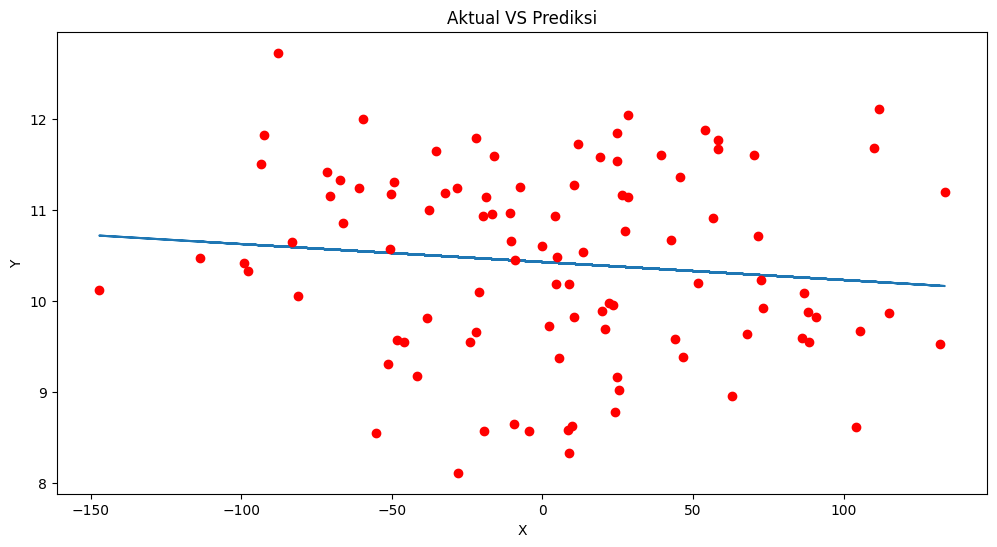

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

xmean = np.mean(X)
ymean = np.mean(Y)

df['xycov'] = (df['Saya'] - xmean) * (df['Cinta'] - ymean)
df['xvar'] = (df['Saya'] - xmean)**2

beta = df['xycov'].sum() / df['xvar'].sum()
alpha = ymean - (beta*xmean)
print(f'alpha = {alpha}')
print(f'beta = {beta}')

ypred = alpha + beta * X

plt.figure(figsize=(12, 6))
plt.plot(X, ypred)
plt.plot(X, Y, 'ro')
plt.title('Aktual VS Prediksi')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

<div style="font-family: Playbill; font-size: 30px; border-radius: 5px;padding: 2px; line-height: 2.0; color: #cd6ea2ff; text-align: center;">~~REGRESI & PLOT 3D~~</div>

In [38]:
import plotly.graph_objects as go 
import numpy as np
import pandas as pd
import statsmodels.api as sm

np.random.seed(30)
s1 = np.random.randint(11, 70, 30)
s2 = np.random.randint(15, 90, 30)
b = 5 + 3 * s1 + 8 * s2 + np.random.normal(1, 30, 30)

df = pd.DataFrame({
    "S1": s1,
    "S2": s2,
    "B": b
})

X = sm.add_constant(df[["S1", "S2"]])
model = sm.OLS(df["B"], X).fit()

koefisien = model.params

scatter_plot = go.Scatter3d(
    x=df["S1"],
    y=df["S2"],
    z=df["B"],
    mode="markers",
    
    marker=dict(
        size=5,
        color="yellow",
        opacity=0.8
    ),
    name="Data"
)

s1_grid, s2_grid = np.meshgrid(np.linspace(2, 20, 10), np.linspace(5, 25, 10))
b_pred = koefisien[0] + koefisien[1] * s1_grid +  koefisien[2] * s2_grid

regression_surface = go.Surface(
    x=s1_grid,
    y=s2_grid,
    z=b_pred,
    colorscale="Blues", 
    opacity=0.5,
    name="Garis Regresi"
)

layout = go.Layout(
    title="Scatter Plot 3D dengan Garis Regresi Berganda", 
    scene=dict(
        xaxis_title="X1",
        yaxis_title="X2",
        zaxis_title="B"
    ),
    showlegend=True
)

fig = go.Figure(data=[scatter_plot, regression_surface], layout=layout)

fig.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13304\2731375318.py:37: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

